In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df = pd.read_csv('train.csv')

In [91]:
df.shape

(404289, 6)

In [92]:
new_df = df.sample(30000)

In [93]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [94]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
45478,Why is Manaphy annoying in Pokemon ranger and ...,"Is Manaphy from ""Pokemon Ranger and The Temple..."
120029,What is the importance of the security code on...,What is the purpose of credit cards using secu...
266089,I am fed up because dont have job n lots of re...,"Is 100,000 Canadian dollars enough to last 4 y..."
156059,How can you delete Instagram likes?,How can you look at someone's private Instagra...
186259,How can I sleep more?,How do you sleep well?


In [95]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [96]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [97]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
45478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120029,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
266089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156059,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
186259,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156509,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
399901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [99]:
temp_df.shape

(30000, 6001)

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [101]:
X_test.shape

(6000, 6000)

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7405

In [103]:
y_pred.shape

(6000,)

[[3427  343]
 [1214 1016]]


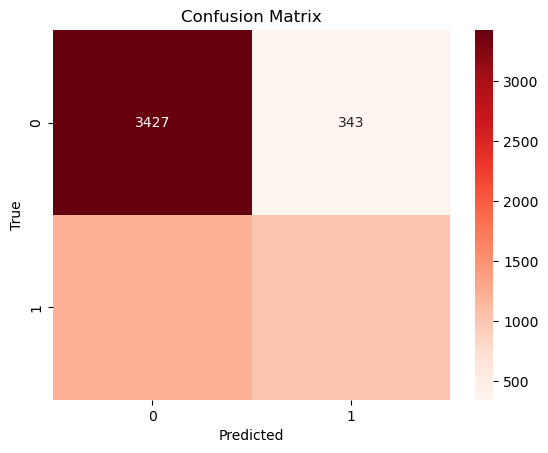

In [108]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

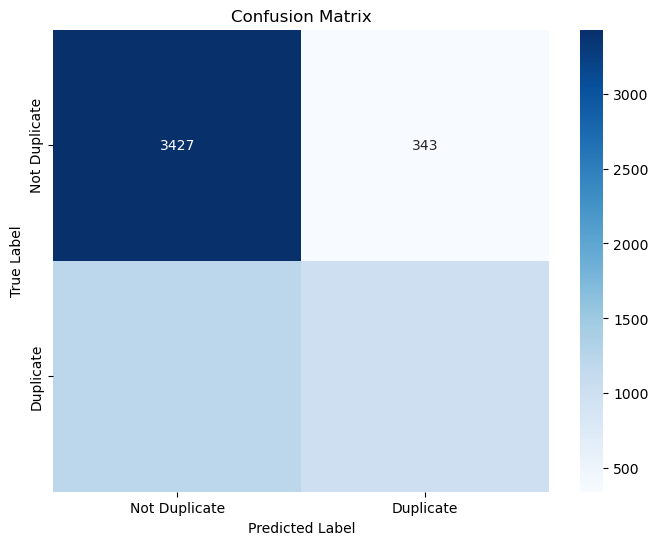

In [105]:
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Duplicate', 'Duplicate'], yticklabels=['Not Duplicate', 'Duplicate'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [106]:
# Size of testing set
test_size = 0.2
total_samples = temp_df.shape[0]
testing_samples = int(test_size * total_samples)
print("Size of testing set:", testing_samples)


Size of testing set: 6000
